In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("dirty_iris.txt")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [5]:
df.dropna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
number_complete=len(df.dropna())

In [7]:
number_complete

150

In [8]:
complete_percent=len(df.dropna())/len(df)

In [9]:
complete_percent

1.0

In [10]:
df.fillna(value="NA",inplace=True)

In [11]:
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [12]:
def species_check(df):
    species=set(["setosa","versicolor","virginica"])
    func=lambda r:r in species
    x=np.array([func(xi) for xi in df["species"]])
    if (False in x):
        print("Violation: Invalid species name")
        print(str(len(x)-np.sum(x))+" Violations")
    else :
        print("No Violation")
    return (len(x)-np.sum(x))

In [13]:
species_check(df)

No Violation


0

In [14]:
tmp=pd.read_csv("dirty_iris.txt")
tmp.dropna(inplace = True)

In [15]:
tmp

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
def all_positive(df) :
    func=lambda r:r>0
    a = np.array([func(df[xi]) for xi in df.columns[:-1]])
    a = a.reshape(a.shape[0]*a.shape[1])
    if (False in a):
        print("Violation: Non-positive values present")
        print(str(len(a)-np.sum(a))+" Violations")
    else:
        print("No Violation")
    return (len(a)-np.sum(a))

In [17]:
all_positive(tmp)

No Violation


0

In [18]:
tmp["petal_length"]>(2*tmp["petal_width"])

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Length: 150, dtype: bool

In [19]:
def check_petal(df):
    a=np.array(df["petal_length"]>(2*df["petal_width"]))
    if (False in a):
        print("Violation: Petal Length is less than twice of Petal Width in some places")
        print(str(len(a)-np.sum(a)) + " Violations")
    else:
        print("No Violation")
    return (len(a)-np.sum(a))

In [20]:
check_petal(tmp)

No Violation


0

In [21]:
def sepal_check(df) :
    a=np.array(df["sepal_length"]<=30)
    if (False in a):
        print("Violation: Sepal Length is greater than 30 cm in some places")
        print(str(len(a)-np.sum(a))+" Violations")
    else:
        print("No Violation")
    return (len(a)-np.sum(a))

In [22]:
sepal_check(tmp)

No Violation


0

In [23]:
def sepal_petal_check(df):
    a = np.array(df["sepal_length"]>df["petal_length"])
    if (False in a):
        print("Violation : Sepal length is greater than petal length in some places")
        print(str(len(a)-np.sum(a))+" violations")
    else :
        print("No Violation")
    return (len(a)-np.sum(a))

In [24]:
sepal_petal_check(tmp)

No Violation


0

In [25]:
Rules={"species_check": species_check, "all_positive": all_positive, "check_petal": check_petal, "sepal_check": sepal_check, "sepal_petal_check": sepal_petal_check}

In [26]:
x=list()
for i in Rules.keys():
    x.append(Rules[i](tmp))

No Violation
No Violation
No Violation
No Violation
No Violation


In [27]:
df.loc[0,:]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

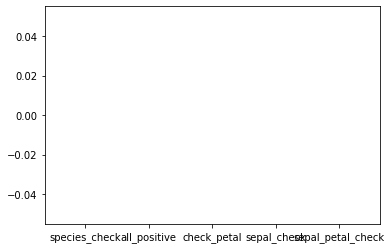

In [28]:
plt.bar(Rules.keys(),x)
plt.show()

In [29]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
tmp.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
z=list()
for i in range(len(tmp.columns)-1) :
    z.append(tmp[tmp.columns[i]])

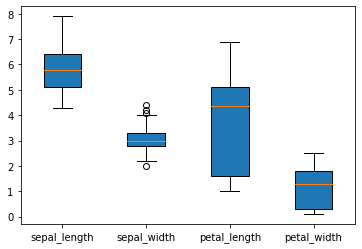

In [32]:
plt.boxplot(z,labels=tmp.columns[:-1],patch_artist=True)
plt.show()